In [ ]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('/content/nacional.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180219 entries, 0 to 180218
Data columns (total 48 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          180219 non-null  object 
 1   EDO         180219 non-null  int64  
 2   MES         180219 non-null  int64  
 3   ANIO        180219 non-null  int64  
 4   MPIO        180219 non-null  int64  
 5   HORA        180219 non-null  int64  
 6   MINUTOS     180219 non-null  int64  
 7   DIA         180219 non-null  int64  
 8   DIASEMANA   180219 non-null  int64  
 9   URBANA      180219 non-null  int64  
 10  SUBURBANA   180219 non-null  int64  
 11  TIPACCID    180219 non-null  int64  
 12  AUTOMOVIL   180219 non-null  int64  
 13  CAMPASAJ    180219 non-null  int64  
 14  MICROBUS    180219 non-null  int64  
 15  PASCAMION   180219 non-null  int64  
 16  OMNIBUS     180219 non-null  int64  
 17  TRANVIA     180219 non-null  int64  
 18  CAMIONETA   180219 non-null  int64  
 19  CA

<ipython-input-3-19b64c38e5df>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/nacional.csv')


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import KMeans


# 2. Extraer columnas necesarias
X = df[['LATITUD', 'LONGITUD', 'CAUSAACCI']].values  # Matriz con datos

# 3. Definir número de clústeres (ajústalo según análisis)
K = 5

# 4. Aplicar K-Means
kmeans = KMeans(n_clusters=K, random_state=42)
df['cluster'] = kmeans.fit_predict(X)  # Asignar cluster a cada punto
centroids = kmeans.cluster_centers_  # Coordenadas de centroides

# 5. Visualizar los resultados en un mapa interactivo
m = folium.Map(location=[df['LATITUD'].mean(), df['LONGITUD'].mean()], zoom_start=10)

# Definir colores para cada tipo de accidente
# Include all unique TIPACCID values as keys in accident_colors
unique_accident_types = df['CAUSAACCI'].unique()
accident_colors = {acc_type: plt.cm.get_cmap('tab10')(i)  # Use a colormap to get distinct colors
                   for i, acc_type in enumerate(unique_accident_types)}

for _, row in df.iterrows():
    # Use .get() to handle missing keys, defaulting to gray
    color = accident_colors.get(row['CAUSAACCI'], 'gray')
    folium.CircleMarker(
        location=[row['LATITUD'], row['LONGITUD']],
        radius=4,
        color=color,  # Use the retrieved color or gray
        fill=True,
        fill_color=color,  # Use the retrieved color or gray
        fill_opacity=0.6
    ).add_to(m)

# Agregar centroides de clusters
for lat, lon, acc_type in centroids:
    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(color="black", icon="info-sign"),
        popup=f"Centroide - Tipo {int(acc_type)}"
    ).add_to(m)

# Guardar mapa y abrir en navegador
m.save("mapa_accidentes.html")


<ipython-input-38-4aaaa9a0099e>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  accident_colors = {acc_type: plt.cm.get_cmap('tab10')(i)  # Use a colormap to get distinct colors


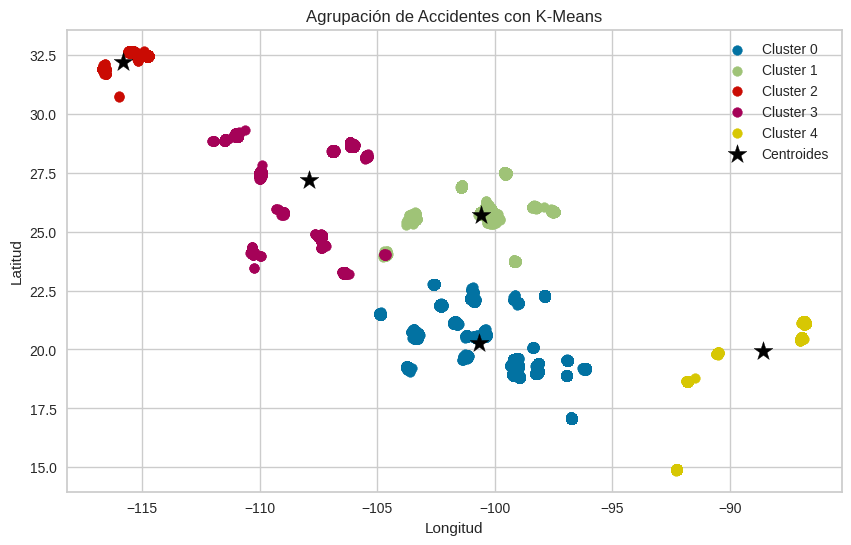

In [39]:
# prompt: ver con matplotlib la agrupacion

import matplotlib.pyplot as plt

# ... (your existing code)

# Visualización con Matplotlib (opcional, para complementar el mapa)
plt.figure(figsize=(10, 6))

# Itera sobre los clusters
for cluster in range(K):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['LONGITUD'], cluster_data['LATITUD'], label=f'Cluster {cluster}')

# Plotea los centroides
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', s=200, c='black', label='Centroides')  # Nota: el índice [:,1] y [:,0] para LONGITUD y LATITUD respectivamente

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Agrupación de Accidentes con K-Means')
plt.legend()
plt.show()


In [40]:
# prompt: ver que tipo de accidente va con cada color

# Assuming 'df' is your DataFrame with 'TIPACCID' and 'cluster' columns

# Create a mapping of cluster numbers to accident types
cluster_accident_mapping = {}
for cluster in df['cluster'].unique():
    # Find the most frequent accident type within each cluster
    most_frequent_accident_type = df[df['cluster'] == cluster]['TIPACCID'].mode().iloc[0]
    cluster_accident_mapping[cluster] = most_frequent_accident_type

# Print the mapping
for cluster, accident_type in cluster_accident_mapping.items():
    print(f"Cluster {cluster}: {accident_type}")


Cluster 0: 1
Cluster 2: 1
Cluster 3: 1
Cluster 4: 1
Cluster 1: 1


In [25]:
X_numericos = df[['EDO', 'TIPACCID']]

In [26]:
from yellowbrick.cluster import KElbowVisualizer

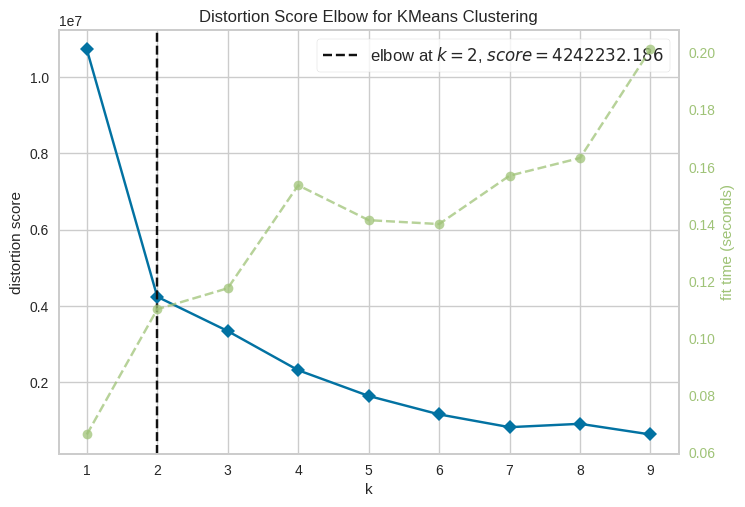

In [27]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X_numericos)
visualizer.show()
plt.show()

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import KMeans


# 2. Extraer columnas necesarias
X = df[['EDO', 'TIPACCID']].values  # Matriz con datos

# 3. Definir número de clústeres (ajústalo según análisis)
K = 2

# 4. Aplicar K-Means
kmeans = KMeans(n_clusters=K, random_state=42)
df['cluster'] = kmeans.fit_predict(X)  # Asignar cluster a cada punto
centroids = kmeans.cluster_centers_  # Coordenadas de centroides

# 5. Visualizar los resultados en un mapa interactivo
m = folium.Map(location=[df['EDO']], zoom_start=10)

# Definir colores para cada tipo de accidente
# Include all unique TIPACCID values as keys in accident_colors
unique_accident_types = df['TIPACCID'].unique()
accident_colors = {acc_type: plt.cm.get_cmap('tab10')(i)  # Use a colormap to get distinct colors
                   for i, acc_type in enumerate(unique_accident_types)}

for _, row in df.iterrows():
    # Use .get() to handle missing keys, defaulting to gray
    color = accident_colors.get(row['TIPACCID'], 'gray')
    folium.CircleMarker(
        location=[row['EDO']],
        radius=3,
        color=color,  # Use the retrieved color or gray
        fill=True,
        fill_color=color,  # Use the retrieved color or gray
        fill_opacity=0.6
    ).add_to(m)

# Agregar centroides de clusters
for lat, lon, acc_type in centroids:
    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(color="black", icon="info-sign"),
        popup=f"Centroide - Tipo {int(acc_type)}"
    ).add_to(m)

# Guardar mapa y abrir en navegador
m.save("mapa_accidentes.html")

ValueError: Expected two (lat, lon) values for location, instead got: [0          1
1          1
2          1
3          1
4          1
          ..
180214    32
180215    32
180216    32
180217    32
180218    32
Name: EDO, Length: 180219, dtype: int64].

In [32]:
# prompt: usar un EDO para localizacion

# ... (your existing code)

# 2. Extraer columnas necesarias
X = df[['EDO', 'TIPACCID']].values  # Matriz con datos

# 3. Definir número de clústeres (ajústalo según análisis)
K = 2  # You might need to adjust this based on your data

# 4. Aplicar K-Means
kmeans = KMeans(n_clusters=K, random_state=42)
df['cluster'] = kmeans.fit_predict(X)  # Asignar cluster a cada punto
centroids = kmeans.cluster_centers_  # Coordenadas de centroides

# --- Visualization improvements ---

# Create a mapping of EDO values to coordinates (replace with actual coordinates)
edo_coordinates = {
    # Example: Replace with your actual coordinates
    1: [25.6866, -100.3161],  # Nuevo Leon
    2: [19.4326, -99.1332],  # Ciudad de Mexico
    # Add more states and their coordinates here
    # ...
}


m = folium.Map(location=[19.4326, -99.1332], zoom_start=4)  # Center the map

for _, row in df.iterrows():
    edo = row['EDO']
    if edo in edo_coordinates:
        lat, lon = edo_coordinates[edo]
        color = accident_colors.get(row['TIPACCID'], 'gray')
        folium.CircleMarker(
            location=[lat, lon],
            radius=3,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=f"Estado: {edo}, Tipo de Accidente: {row['TIPACCID']}"
        ).add_to(m)
    else:
        print(f"Warning: Coordinates not found for EDO {edo}")


# Agregar centroides de clusters (considerando que 'centroids' es válido para los features 'EDO' y 'TIPACCID')
# The centroids themselves don't have direct geographical meaning in this context.
# You'd need to map the centroid values to the coordinates using the edo_coordinates dictionary (if relevant).
for i, centroid in enumerate(centroids):
  # Example: If you have a way to map centroid values back to coordinates.
  # This part will need adaptation to your data structure.
  # Assuming the first element in centroid is an EDO number
  edo_centroid = int(centroid[0])
  if edo_centroid in edo_coordinates:
      folium.Marker(
          location=edo_coordinates[edo_centroid],
          icon=folium.Icon(color="black", icon="info-sign"),
          popup=f"Centroide {i} - Tipo {int(centroid[1])}"  # Assuming the second element is the 'TIPACCID'
      ).add_to(m)



Se truncaron las últimas líneas 5000 del resultado de transmisión.


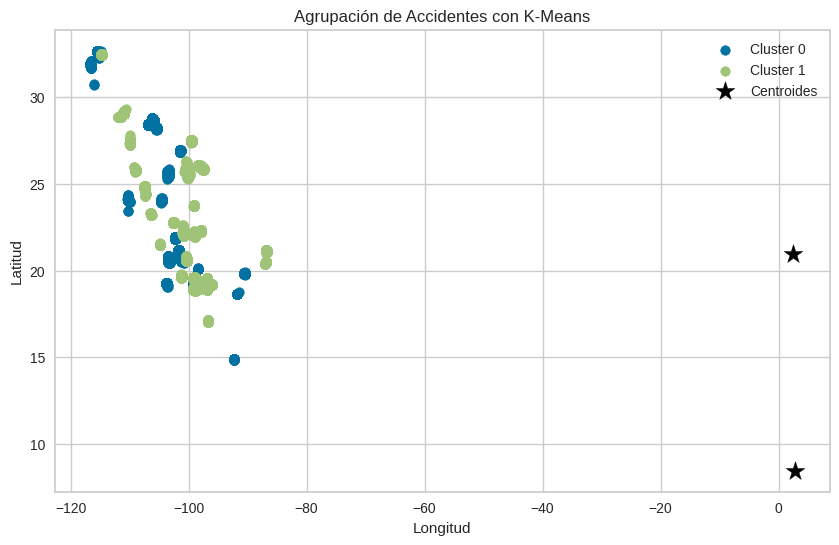

In [33]:
# prompt: ver con matplotlib la agrupacion

import matplotlib.pyplot as plt

# ... (your existing code)

# Visualización con Matplotlib (opcional, para complementar el mapa)
plt.figure(figsize=(10, 6))

# Itera sobre los clusters
for cluster in range(K):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['LONGITUD'], cluster_data['LATITUD'], label=f'Cluster {cluster}')

# Plotea los centroides
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', s=200, c='black', label='Centroides')  # Nota: el índice [:,1] y [:,0] para LONGITUD y LATITUD respectivamente

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Agrupación de Accidentes con K-Means')
plt.legend()
plt.show()